In [1]:
import numpy as np
X_normal = np.random.normal(loc=0, scale=1, size=(2, 50))
X_normal.shape

(2, 50)

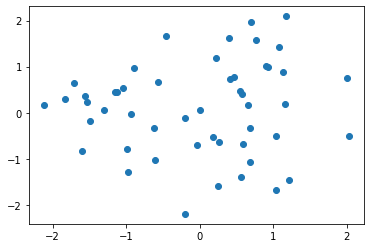

In [2]:
import matplotlib.pyplot as plt
plt.scatter(X_normal[0,:], X_normal[1, :])

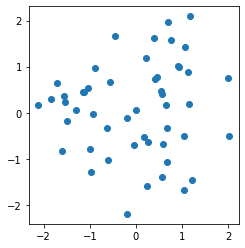

In [3]:
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(X_normal[0,:], X_normal[1, :])

In [4]:
W = np.random.RandomState(6).rand(2, 2)
W

array([[0.89286015, 0.33197981],
       [0.82122912, 0.04169663]])

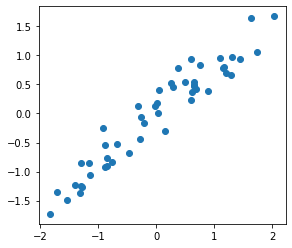

In [5]:
X_pre = W @ X_normal
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(X_pre[0,:], X_pre[1, :])

[[ 0.00961208]
 [-0.01718201]]


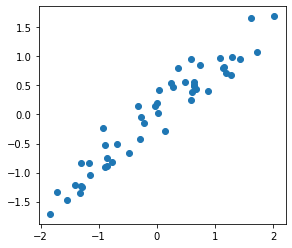

In [6]:
X_pre_mean = X_pre.mean(axis=1)
X_pre_mean = X_pre_mean[:, np.newaxis]
print(X_pre_mean)
X = X_pre - X_pre_mean
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(X[0,:], X[1, :])

In [7]:
from numpy.testing import assert_almost_equal
assert_almost_equal(X.mean(axis=1), 0)

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(X.T)

PCA(n_components=1)

In [9]:
L = pca.transform(X.T).T
L

array([[ 1.38693912, -1.53023447, -0.49933908,  1.40988732,  1.40731934,
         0.81618771,  0.79789317,  2.01148622, -1.42325928,  0.53123379,
         0.52054188,  1.62618745,  0.60837567, -1.13290778,  1.70651232,
         1.45991187, -0.84764891, -1.01220569, -1.78238569,  0.29297268,
         0.79114257,  2.31341265, -0.85725525, -1.78508303, -1.27070537,
         2.63757296, -2.51080383, -1.55915188, -1.85884274, -0.07970276,
        -1.11923493, -0.79894032,  0.78960661,  0.13650908,  0.94034688,
        -2.16516581, -1.22532924,  0.8482121 , -0.26909247,  0.02888278,
         1.37031713, -1.88020433,  1.0703611 ,  1.11511464, -0.24179107,
         0.07159628, -0.14579959,  0.73620392, -2.13489497,  0.70525126]])

In [10]:
P1 = pca.components_
P1

array([[0.76393043, 0.64529861]])

In [11]:
cov_matrix = np.cov(X)
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print(eig_vecs)

[[ 0.76393043 -0.64529861]
 [ 0.64529861  0.76393043]]


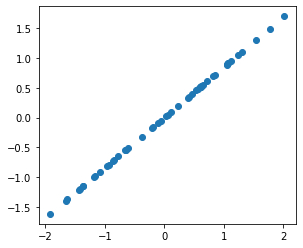

In [12]:
X_projected = P1.T @ L
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(X_projected[0,:], X_projected[1, :])

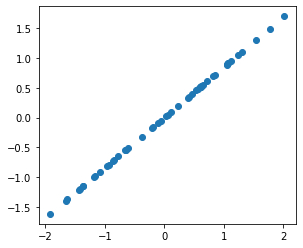

In [14]:
X_projected = eig_vecs[:,:1] @ L
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(X_projected[0,:], X_projected[1, :])

In [15]:
re = np.linalg.norm(X - X_projected, axis=0).sum()
re

7.650622497837523